## Model comparisson
This notebook will compare three different ml models on the same dataset.

### Code and data setup

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import NeuralNet as new_nn
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [35]:
df = pd.read_csv("data/wine_prepared.csv")

In [36]:
X = df.drop(columns=["quality"])
y = df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Multi-linear regression

In [37]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [38]:
print("Model score: ", mlr_model.score(X_test, y_test))
y_pred = mlr_model.predict(X_test)

print("Mean squared error (MSE): ", mean_squared_error(y_test, y_pred))
print("Mean absolute error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean absolute percentage error (MAPE): ", mean_absolute_percentage_error(y_test, y_pred))

Model score:  0.2984279643597243
Mean squared error (MSE):  0.40688275035082366
Mean absolute error (MAE):  0.5154164116492492
Mean absolute percentage error (MAPE):  0.09110192849204782


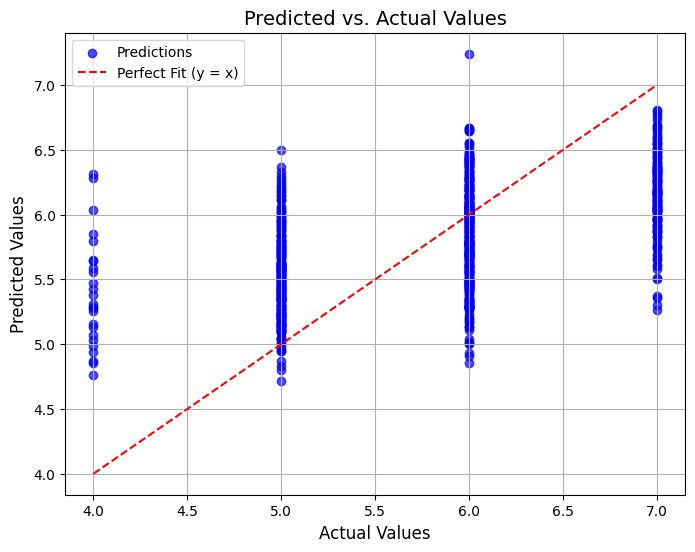

In [39]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predictions')

# Add reference line (y = x)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Fit (y = x)')

# Add labels and title
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Predicted vs. Actual Values", fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig("scatter_mlr.png")

# Show the plot
plt.show()

### Implemented neural network

In [40]:
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

In [41]:
layers = [13, 32, 8, 1]
model = new_nn.NeuralNet(layers, 100, 0.001, 0.0, "relu", 0.1, debug=False)

In [42]:
model.fit(X_train_np, y_train_np)

Neural network starts training
Neural network ends training


In [43]:
y_pred = model.predict(X_test_np)

print("Mean squared error (MSE): ", mean_squared_error(y_test_np, y_pred))
print("Mean absolute error (MAE): ", mean_absolute_error(y_test_np, y_pred))
print("Mean absolute percentage error (MAPE): ", mean_absolute_percentage_error(y_test_np, y_pred))

Mean squared error (MSE):  0.3869853126902674
Mean absolute error (MAE):  0.5017452113894917
Mean absolute percentage error (MAPE):  0.08831151670698714


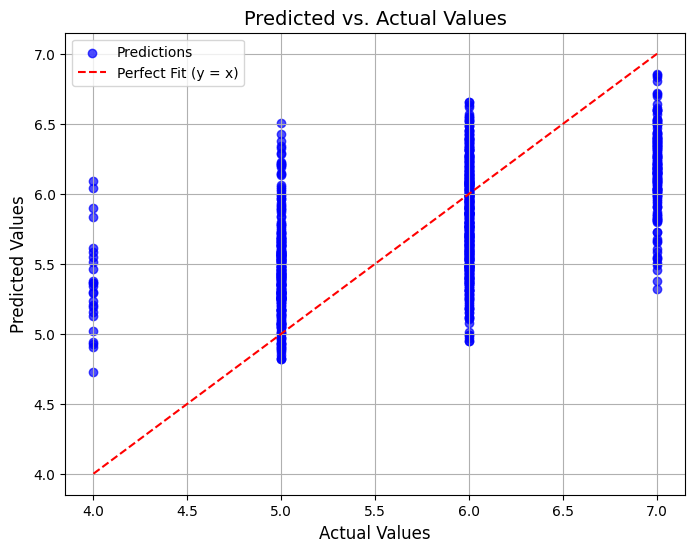

In [44]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred, color='blue', alpha=0.7, label='Predictions')

# Add reference line (y = x)
plt.plot([y_test_np.min(), y_test_np.max()],
         [y_test_np.min(), y_test_np.max()],
         color='red', linestyle='--', label='Perfect Fit (y = x)')

# Add labels and title
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Predicted vs. Actual Values", fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig("scatter_our_nn.png")

# Show the plot
plt.show()

### PyTorch neural network

In [45]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
# X_validation_tensor = torch.tensor(X_validation.values, dtype=torch.float32)
# y_validation_tensor = torch.tensor(y_validation.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [46]:
batch_size = 16
train_data = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
# validation_data = DataLoader(TensorDataset(X_validation_tensor, y_validation_tensor), batch_size=batch_size)
test_data = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size)

In [47]:
class WineQualityPredictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(X.shape[1], 32)
        self.act1 = nn.ReLU()
        # self.dropout = nn.Dropout(0.5)
        # self.hidden2 = nn.Linear(128, 64)
        # self.act2 = nn.ReLU()
        # self.hidden3 = nn.Linear(64, 32)
        # self.act3 = nn.ReLU()
        # self.hidden4 = nn.Linear(256, 128)
        # self.act4 = nn.ReLU()
        # self.hidden5 = nn.Linear(16, 10)
        # self.act5 = nn.ReLU()
        self.hidden6 = nn.Linear(32, 8)
        self.act6 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.act_output = nn.Linear(1, 1)
 
    def forward(self, x):
        x = self.act1(self.hidden1(x))
        # x = self.act2(self.hidden2(x))
        # x = self.act3(self.hidden3(x))
        # x = self.act4(self.hidden4(x))
        # x = self.act5(self.hidden5(x))
        x = self.act6(self.hidden6(x))
        x = self.act_output(self.output(x))
        return x
 
# model = WineQualityPredictor()
# print(model)

In [51]:
model = WineQualityPredictor()
loss_fn = nn.MSELoss()  # minimum squared error
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Define a learning rate scheduler
# scheduler = StepLR(optimizer, step_size=50, gamma=0.1)  # Halve the LR every 10 epochs

In [52]:
n_epochs = 100
training_losses = []
validation_losses = []
training_accuracies = []
validation_accuracies = []

loss = 0
# train_start = time.time()
# epoch_start = time.time()
for epoch in range(n_epochs):
    # epoch_start = time.time()
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    for X_batch, y_batch in train_data:
        # Forward pass
        outputs = model(X_batch)
        loss = loss_fn(outputs, y_batch)
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        # measure accuracy
        train_correct += (outputs.round() == y_batch).sum().item()
        train_total += y_batch.size(0)
    
    # scheduler.step()
    train_loss /= len(train_data)
    train_accuracy = 100*train_correct / train_total            
    
    # model.eval()  # Set model to evaluation mode
    # val_loss = 0.0
    # val_correct = 0
    # val_total = 0
    # with torch.no_grad():  # Disable gradient computation for validation
    #     for batch in validation_data:
    #         inputs, targets = batch
    #         outputs = model(inputs)
    #         loss = loss_fn(outputs, targets.unsqueeze(1))
    #         val_loss += loss.item()

    #         val_correct += (outputs.round() == targets).sum().item()
    #         val_total += targets.size(0)
    
    # val_loss /= len(validation_data)
    # val_accuracy = 100*val_correct / val_total
    
    # if epoch > 0:
    #     update_plot(epoch, train_loss, val_loss, train_accuracy, val_accuracy)
    
    # epoch_end = time.time()
    # now = datetime.now()
    # current_time = now.strftime("%H:%M")
    # # print(f"{current_time}\tEpoch {epoch+1}/{n_epochs}\tTrain Loss: {train_loss/len(train_data):.4f}\tVal Loss: {val_loss/len(validation_data):.4f}\tTime(m): {(epoch_end - epoch_start)/60:.4f}")
    # print(f"{current_time}\tEpoch {epoch+1}/{n_epochs}\tTrain Loss: {train_loss:.4f}\tTrain Accuracy: {train_accuracy:.4f}\tVal Loss: {val_loss:.4f}\tValidation Accuracy: {val_accuracy:.4f}\tTime(m): {(epoch_end - epoch_start)/60:.4f}")

#     if (epoch) % 20 == 0:
#         epoch_end = time.time()
#         print(f'Epoch {epoch}, loss {loss}, time {(epoch_end - epoch_start)/60}/{(epoch_end - train_start)/60}')
#         epoch_start = time.time()
# epoch_end = time.time()
# print(f'Epoch {n_epochs}, loss {loss}, time {(epoch_end - epoch_start)/60}/{(epoch_end - train_start)/60}')
# print(f"DONE, total time {(epoch_end - train_start)/60:.4f}")

In [53]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).squeeze()

print("Mean squared error (MSE): ", mean_squared_error(y_test, y_pred))
print("Mean absolute error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean absolute percentage error (MAPE): ", mean_absolute_percentage_error(y_test, y_pred))


Mean squared error (MSE):  0.3876354420872807
Mean absolute error (MAE):  0.5005327053140106
Mean absolute percentage error (MAPE):  0.08969065805495102
